<a href="https://colab.research.google.com/github/davidgarciaf/CD-TI/blob/main/AA1_P2_12_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 2. Regresión lineal.
#### David García Fernández y Sara Cobelo Cabrerizo

In [ ]:
# import numpy, pandas, matplotlib, seaborn
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
# extraemos los datos con pandas
data_train = pd.read_csv("dataset_housing_preprocesado_train.csv")
data_test = pd.read_csv("dataset_housing_preprocesado_test.csv")

## Semana 1

### Paso 1: Eliminación de variables colineales.

El objetivo es eliminar aquellas variables que son linealmente dependientes porque estas pueden afectar negativamente a la construcción de nuestro modelo.

Echamos una primera vista a las características de los distintos atributos.

In [ ]:
pd.options.display.max_rows=None
pd.options.display.max_columns=None
data_train.describe()

,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl_CompShg,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating_GasA,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt_gt_1990,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,SalePrice,Condition_Artery,Condition_Feedr,Condition_Norm,Condition_PosA,Condition_PosN,Condition_RRAe,Condition_RRAn,Condition_RRNe,Condition_RRNn,Exterior_AsbShng,Exterior_AsphShn,Exterior_BrkComm,Exterior_BrkFace,Exterior_CBlock,Exterior_CemntBd,Exterior_HdBoard,Exterior_ImStucc,Exterior_MetalSd,Exterior_Plywood,Exterior_Stone,Exterior_Stucco,Exterior_VinylSd,Exterior_Wd Sdng,Exterior_WdShing,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Hip,RoofStyle_Other,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_Other,Foundation_PConc
count,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.00000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.00000,781.000000,781.000000,781.000000,781.000000,781.000000,781.00000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.0,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.00000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.00000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000
mean,54.512164,10109.405890,0.431498,2.839949,0.464789,0.0550

Encontramos una variable con características que nos resultan extrañas: Exterior_CBlock

In [ ]:
data_train["Exterior_CBlock"].describe()

count    781.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: Exterior_CBlock, dtype: float64

Es claro que esta columna está formada únicamente por valores 0. Por tanto, no aporta información y la eliminamos del conjuntos de datos de entrenamiento y de test.

In [ ]:
data_train.drop(["Exterior_CBlock"], axis=1, inplace=True)
data_test.drop(["Exterior_CBlock"], axis=1, inplace=True)

Ahora mostramos un correlograma en el que se representan las correlaciones entre las distintas variables, recordando que queremos eliminar aquellas que son linealmente dependientes.

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


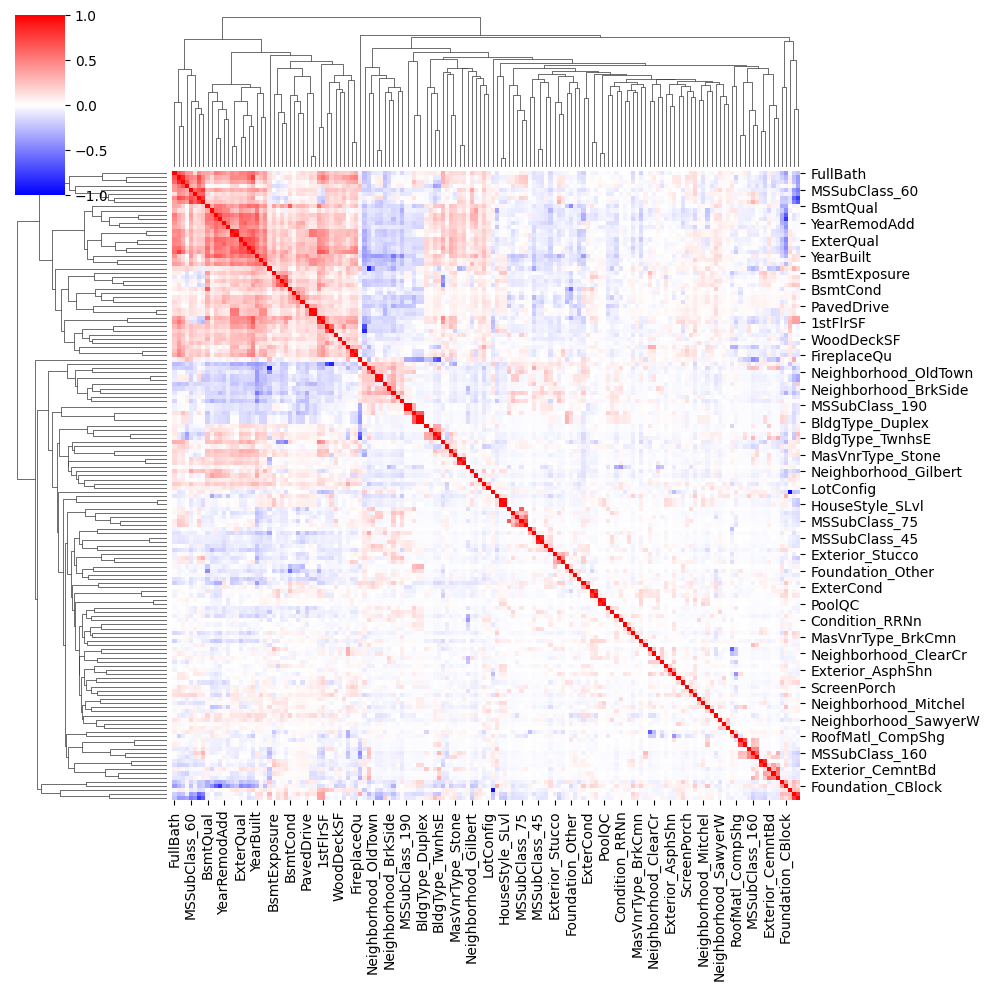

In [ ]:
sns.clustermap(data_train.corr(), cmap="bwr", vmax=1, vmin=-1, figsize=(10,10));

Antes de eliminar dichas variables separamos el target en los conjuntos de entrenamiento y test

In [ ]:
target = "SalePrice"
X_train = data_train.drop(target, axis=1)
y_train = data_train[target]
X_test  = data_test.drop(target, axis=1)
y_test  = data_test[target]

Para conocer el número de variables dependientes que hay, calculamos el rango de la matriz de covarianza y lo comparamos con las dimensiones de nuestra matriz de atributos.

In [ ]:
print("Hay",X_train.shape[1],"atributos")
print("La matriz de covarianza tiene rango",np.linalg.matrix_rank( X_train.cov() ))
print('Número de atributos que son linealmente dependientes:',X_train.shape[1]-np.linalg.matrix_rank( X_train.cov() ))

Hay 151 atributos
La matriz de covarianza tiene rango 139
Número de atributos que son linealmente dependientes: 12


Antes de continuar con el análisis de las variables, procedemos a realizar un estudio del rango de la matriz para los siguientes casos:

1. Inventa un dataset con 10 filas y 2 columnas de datos donde una sea el doble que la otra.

In [ ]:
A1=np.random.rand(10,1)
A2=2*A1
A=np.hstack((A1, A2))
A_rango=np.linalg.matrix_rank(A)
print('Rango de A:',A_rango)

Rango de A: 1


2. Haz el mismo análisis donde uno de los elementos de la segunda columna no sea el doble de la primera.


In [ ]:
B1=np.random.rand(10,1)
B2=np.random.rand(10,1)
B2[0:8]=2*B1[0:8]
B2[9] = np.random.rand()
B=np.hstack((B1,B2))
B_rango=np.linalg.matrix_rank(B)
print('Rango de B:',B_rango)

Rango de B: 2


3. Define ahora otra tercera columna que sea la suma de las dos primeras.

In [ ]:
C1=np.random.rand(10,1)
C2=np.random.rand(10,1)
C2[0:8]=2*C1[0:8]
C2[9] = np.random.rand()
C3=C1+C2
C=np.hstack((C1,C2,C3))
C_rango=np.linalg.matrix_rank(C)
print('Rango de C:',C_rango)

Rango de C: 2


4. Genera una matriz aleatoria de datos de N filas y M columnas (N>M)

In [ ]:
N=[57,65,72]
M=[16,57,43]
print('Para los valores siguientes de N y M:')
print('N=',N)
print('M=',M)
print('El rango para los distintos valores de N y M, siempre que N>M:')
for i in range(len(N)):
    df= pd.DataFrame(np.random.rand(N[i],M[i]))
    D_rango=np.linalg.matrix_rank(df)
    print(D_rango)


Para los valores siguientes de N y M:
N= [57, 65, 72]
M= [16, 57, 43]
El rango para los distintos valores de N y M, siempre que N>M:
16
57
43


Por lo que una vez realizado este estudio, continuamos con el análisis del rango de la matriz de datos y con la posterior eliminación de las variables dependientes.

El método de eliminación de las variables dependientes se describe mediante el siguiente código, que funciona de la siguiente manera: Partimos de la matriz de atributos, conociendo el rango de la matriz de covarianza. A través de un bucle, recorremos los distintos atributos uno a uno y realizamos el siguiente proceso: eliminamos el atributo en cuestión de la matriz de atributos y medimos el nuevo rango de la matriz de covarianza sin él. Si el rango ha disminuido, es porque la variable eliminada era independiente, por lo que la recuperamos y la volvemos a introducir en la matriz de atributos. En el caso de que el rango de la matriz de covarianza no se vea afectado, es porque la variable eliminada era dependiente, por lo que la eliminamos definitivamente de la matriz de atributos.

In [ ]:
cols = X_train.columns;
rank = np.linalg.matrix_rank( X_train.cov() );
for col in cols:
    #print(col)
    cols2 = cols.drop(col)
    #print(cols2)
    Xaux = X_train.copy()
    Xaux.drop([col], axis=1, inplace=True)
    rank2 = np.linalg.matrix_rank( Xaux.cov() )
    #print("rango:",rank2)
    if rank2 == rank:
        X_train.drop([col], axis=1, inplace=True)
        X_test.drop([col], axis=1, inplace=True)



De esta manera nos quedamos únicamente los atributos linealmente independientes, cuyo número debe de coincidir con el rango de la matriz de covarianza.

In [ ]:
print('Ahora hay', X_train.shape[1],'atributos en X_train')
print('Ahora hay', X_test.shape[1],'atributos en X_test')
print("La matriz de covarianza tiene rango",np.linalg.matrix_rank( X_train.cov() ))

Ahora hay 139 atributos en X_train
Ahora hay 139 atributos en X_test
La matriz de covarianza tiene rango 139


### Paso 2: Construcción de un primer modelo.

Construimos un modelo de regresión lineal usando sklearn y calculamos su coeficiente de determinación R2 en training y en test.

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('Train score:',model.score(X_train, y_train))
print('Test score:',model.score(X_test, y_test))

Train score: 0.9424614967584222
Test score: 0.8768548653214119


Para determinar si hay sobreajuste, debes comparar el valor de R^2 en el conjunto de entrenamiento con el valor en el conjunto de prueba. Si R^2 es significativamente mayor en el conjunto de entrenamiento que en el conjunto de prueba, puede indicar sobreajuste. Sin embargo, un pequeño margen de diferencia es aceptable, ya que es común que R^2 sea ligeramente mayor en el conjunto de entrenamiento debido a que el modelo se ha ajustado precisamente a esos datos.

Estos valores sugieren que tu modelo tiene un buen rendimiento tanto en el conjunto de entrenamiento como en el conjunto de prueba. El valor R^2 cercano a 1 en el conjunto de entrenamiento indica que el modelo explica una gran parte de la variabilidad en los datos de entrenamiento, y el valor R^2 cercano a 0.877 en el conjunto de prueba sugiere que el modelo también generaliza bien a datos no vistos.

No parece haber un problema de sobreajuste en este caso, ya que el puntaje en el conjunto de prueba es bastante alto y se encuentra cerca del puntaje en el conjunto de entrenamiento.

Creamos un scatter plot en el que mostramos el precio real de la casa y el precio estimado del modelo para los datos de training y del test

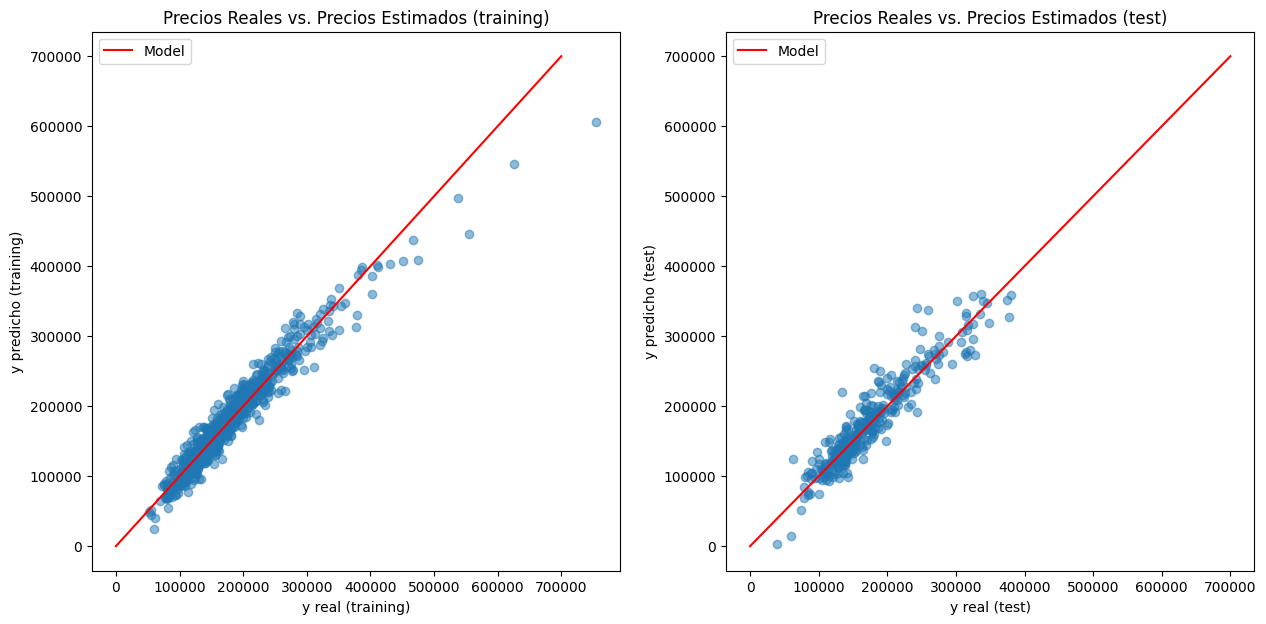

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.plot(y_train, model.predict(X_train), "o", alpha=0.5)
plt.plot([0,700000],[0,700000],"r", label="Model")
plt.xlabel("y real (training)")
plt.ylabel("y predicho (training)")
plt.title('Precios Reales vs. Precios Estimados (training)')
plt.legend()

plt.subplot(1,2,2)
plt.plot(y_test, model.predict(X_test), "o", alpha=0.5)
plt.plot([0,700000],[0,700000],"r", label="Model")
plt.xlabel("y real (test)")
plt.ylabel("y predicho (test)")
plt.title('Precios Reales vs. Precios Estimados (test)')
plt.legend();

Podemos ver que el modelo que hemos creado ajusta bien tanto los datos de entrenamiento como los datos de test. En cuanto al coeficiente R^2 hemos visto que era de 0.94 para el training y de 0.88 para el test. Como es usual, el ajuste es ligeramente peor para el test. Sin embargo, un R^2 de 0.9 nos indica que el modelo lineal es capaz de predecir correctamente en torno al 90% de los valores del precio conociendo sus atributos.

In [ ]:
coef = model.coef_
intercept = model.intercept_
print('Coeficientes:',coef)
print('Térm. independiente:',intercept)

Coeficientes: [ 1.98310774e+01  1.43394341e+00  6.74551200e+02 -1.32667432e+03
 -9.25205327e+02 -5.09840585e+03  1.00473734e+04  6.06884698e+03
  4.18683880e+02  2.95788856e+01 -2.05587845e+04  5.38934070e+01
  8.42340621e+03 -1.38229301e+03  3.67702933e+02 -1.00582897e+04
  5.86359057e+03 -4.57590380e+02  3.46295713e+02 -1.37207305e+01
 -1.82676053e+01  4.24106233e+01 -3.38782436e+03  1.39384439e+03
 -8.13382118e+02  2.80243996e+03  2.44795820e+01  2.98723358e+00
  5.24245164e+01  3.20726434e+03  2.10339501e+03 -4.39138159e+03
 -2.00139652e+03 -5.00934845e+03 -6.55846646e+03  2.76513562e+03
  2.78975829e+02  3.54322909e+03  7.41922905e+03 -2.63601287e+03
 -1.33468285e+03  3.81337604e+03  1.14406386e+03  2.60932299e+03
 -5.33100309e+00  6.59532062e+03 -6.14270423e+03  2.98248556e+03
  6.55089097e+00  2.84130921e+01  9.07152461e+00  4.15998133e-01
  4.26622704e+01 -1.80924521e+01  8.79281691e+03 -3.34259154e+02
  1.11095662e-01 -6.61087217e+03 -7.74134925e+03 -1.54719140e+04
 -1.5568403

Calculamos manualmete las predicciones de y (SalePrice) a partir de los coeficientes obtenidos para nuestro modelo de Regresión

In [ ]:
y_train_prediction = np.dot(X_train, coef.T) + intercept
y_test_prediction = np.dot(X_test, coef.T) + intercept

Para compararlos con los calculados internamente por nuestro modelo realizamos la resta de ambos y vemos el resultado

In [ ]:
aux_train = y_train_prediction == model.predict(X_train)
aux_test = y_test_prediction == model.predict(X_test)
print('¿Coinciden las predicciones manuales y realizadas por el modelo en training?')
print(pd.DataFrame(aux_train).value_counts())
print('de',X_train.shape[0])
print('¿Coinciden las predicciones manuales y realizadas por el modelo en test?')
print(pd.DataFrame(aux_test).value_counts())
print('de',X_test.shape[0])

¿Coinciden las predicciones manuales y realizadas por el modelo en training?
True    781
dtype: int64
de 781
¿Coinciden las predicciones manuales y realizadas por el modelo en test?
True    335
dtype: int64
de 335


Vemos que tanto para el training como para el test todos los valores coinciden exactamente.

Ahora analizamos cómo son los residuos

In [ ]:
y_pred_train= model.predict(X_train)
y_pred_test=model.predict(X_test)
residuos_train= y_train - y_pred_train
residuos_test= y_test - y_pred_test


Text(0.5, 1.0, 'Residuos (test)')

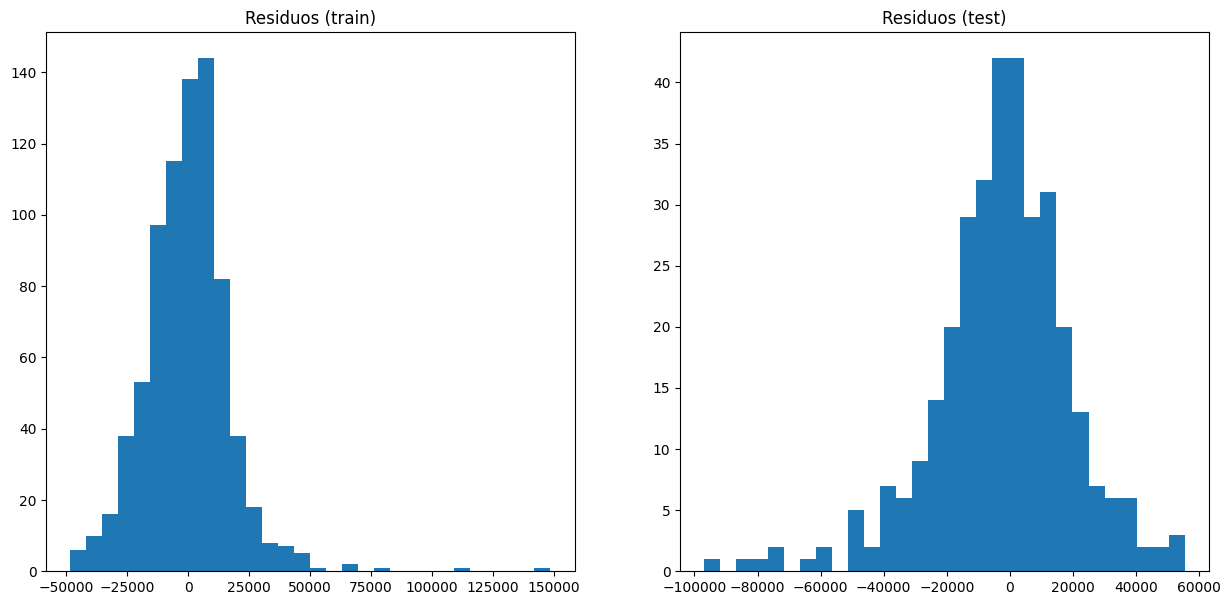

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.hist(residuos_train, bins=30)
plt.title('Residuos (train)')

plt.subplot(1,2,2)
plt.hist(residuos_test, bins=30)
plt.title('Residuos (test)')


Como podemos observar, se cumple la suposición de que los residuos siguen una distribución gaussiana.

A continuación, vamos a estudiar el efecto que de transformar de manera no lineal el target usando la transformación logarítmica.

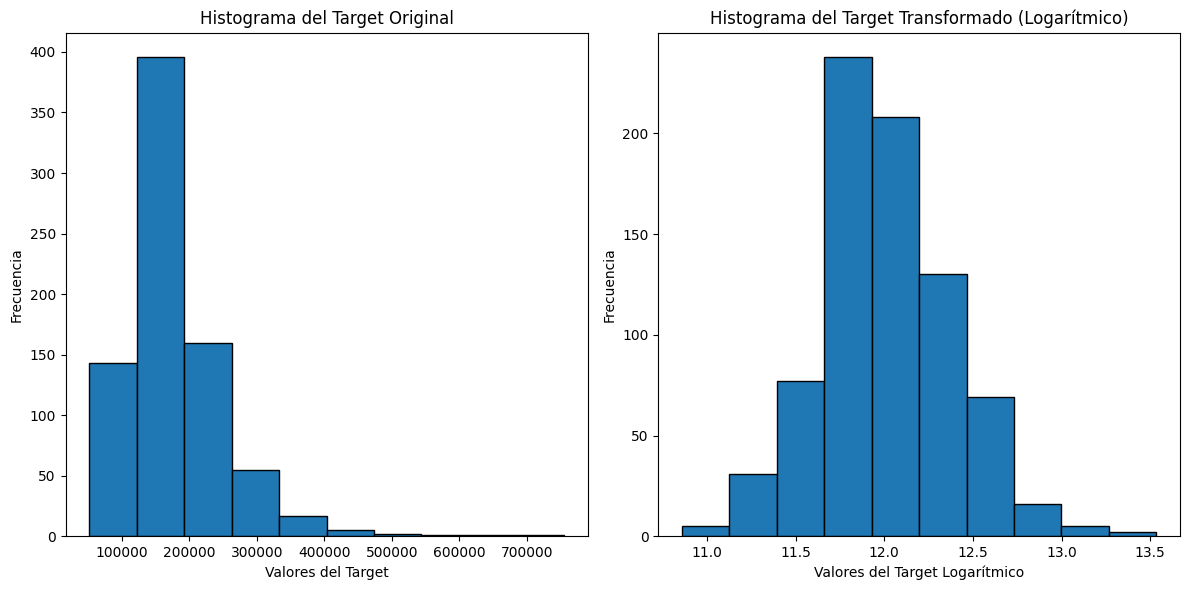

In [ ]:
y_train_log=np.log(y_train)

plt.figure(figsize=(12, 6))

# Histograma del target original
plt.subplot(1, 2, 1)
plt.hist(y_train, bins=10, edgecolor='black')
plt.title('Histograma del Target Original')
plt.xlabel('Valores del Target')
plt.ylabel('Frecuencia')

# Histograma del target transformado logarítmicamente
plt.subplot(1, 2, 2)
plt.hist(y_train_log, bins=10, edgecolor='black')
plt.title('Histograma del Target Transformado (Logarítmico)')
plt.xlabel('Valores del Target Logarítmico')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Cuando se aplica una transformación logarítmica al target, se busca reducir la variabilidad en los valores extremos y hacer que los datos se distribuyan de manera más uniforme. Esto puede ser útil cuando los datos originales tienen una distribución sesgada o contienen valores atípicos que pueden afectar negativamente el rendimiento del modelo.

In [ ]:
from sklearn.metrics import r2_score

y_test_log=np.log(y_test)

model = LinearRegression()
model.fit(X_train, y_train_log)

y_pred_log = model.predict(X_test)
y_pred = np.exp(y_pred_log)

r2_original = r2_score(np.exp(y_test_log), y_pred)

print("Coeficiente de determinación R^2 en la escala original:", r2_original)

Coeficiente de determinación R^2 en la escala original: 0.929604641933566


Un coeficiente de determinación R^2 cercano a 1 indica que el modelo ha mejorado significativamente en su capacidad para hacer predicciones precisas en la escala original de la variable target (dólares) después de aplicar una transformación logarítmica y una posterior transformación exponencial al target. Esto sugiere que el modelo ahora se ajusta mucho mejor a los datos reales, lo que significa que las relaciones lineales entre las características y la variable target se capturan de manera más efectiva, lo que se traduce en un R^2 más alto en la escala original.

## Semana 2

### Paso 1: Construcción de un modelo lineal con librería statsmodels.

In [ ]:
#Importo la libreria
import statsmodels.api as sm

In [ ]:
# Ajusta un modelo de regresión lineal por medio de statsmodels
modelo = sm.OLS(y_train, sm.add_constant(X_train))
resultado = modelo.fit()

# Obtiene los coeficientes del modelo
coeficientes_stats= resultado.params

# Imprime los coeficientes
print('Coeficientes calculados por statsmodels',coeficientes_stats)


const                  -951648.657512
LotFrontage                 19.831077
LotArea                      1.433943
LotShape                   674.551200
LandContour              -1326.674317
LotConfig                 -925.205327
LandSlope                -5098.405853
OverallQual              10047.373368
OverallCond               6068.846983
YearBuilt                  418.683880
YearRemodAdd                29.578886
RoofMatl_CompShg        -20558.784544
MasVnrArea                  53.893407
ExterQual                 8423.406209
ExterCond                -1382.293010
BsmtQual                   367.702933
BsmtCond                -10058.289693
BsmtExposure              5863.590567
BsmtFinType1              -457.590380
BsmtFinType2               346.295713
BsmtFinSF2                 -13.720731
BsmtUnfSF                  -18.267605
TotalBsmtSF                 42.410623
Heating_GasA             -3387.824360
HeatingQC                 1393.844391
CentralAir                -813.382118
Electrical  

In [ ]:
#Mirar la diferencia entre los coeficientes calculados por ambos métodos
print('Coeficientes calculados por statsmodels',coeficientes_stats)

### Paso 2: Selección de variables con statsmodels.

### Paso 3: Selección de variables con regularización.